# Importing Libraries

In [60]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

In [3]:
ccd = pd.read_csv('/Users/ashishpodar/Desktop/Datasets/UCI_Credit_Card.csv', index_col = "ID")
ccd.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [7]:
ccd.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29999,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
30000,50000.0,1,2,1,46,0,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


# Preprocessing

# 1. Missing Values

In [9]:
ccd.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [10]:
#No Missing Values

In [14]:
ccd['EDUCATION'].dtype

dtype('int64')

# Initial Visualizations


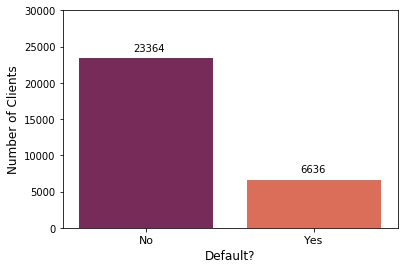

In [27]:
#Barplots to compare defaulters and non-defaulters
plt.figure(figsize=(6,4))

ax = sns.countplot(x="default.payment.next.month", data=ccd, palette="rocket")

plt.xlabel("Default?", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,30000)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))
    
plt.show()

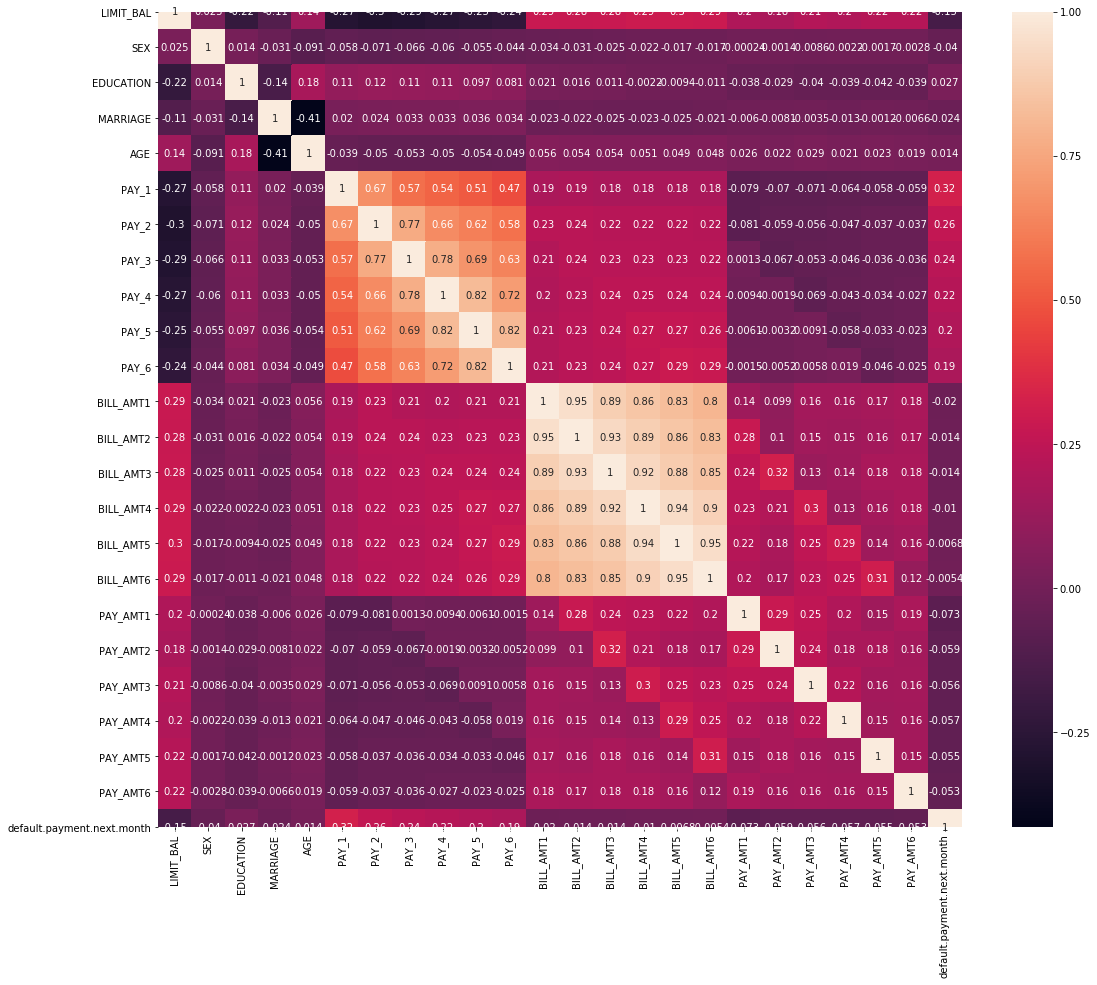

In [127]:
#Correlation Heatmap
plt.figure(figsize=(18,15))
sns.heatmap(ccd.corr(), annot=True)
plt.show()

In [ ]:
#There is high correlation between Bill amounts
#Correlation is also significant between Payments

# 2. Removing Outliers

In [32]:
#Comparing Scatterplots of Numerical Columns with target Variables

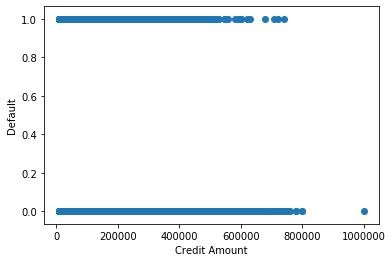

In [64]:
fig,ax = plt.subplots()
ax.scatter(x = ccd['LIMIT_BAL'], y = ccd['default.payment.next.month'])
plt.ylabel('Default')
plt.xlabel('Credit Amount')
plt.show()

In [65]:
ccd[ccd['LIMIT_BAL'] > 800000]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
2198,1000000.0,2,1,1,47,0,0,0,-1,0,...,891586.0,927171.0,961664.0,50784.0,50723.0,896040.0,50000.0,50000.0,50256.0,0


In [66]:
#Outlier row removed
ccd = ccd.drop(2198)

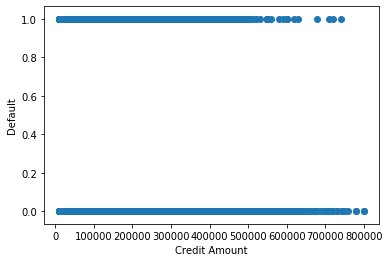

In [73]:
fig,ax = plt.subplots()
ax.scatter(x = ccd['LIMIT_BAL'], y = ccd['default.payment.next.month'])
plt.ylabel('Default')
plt.xlabel('Credit Amount')
plt.show()

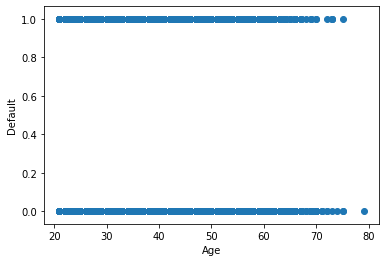

In [74]:
fig,ax = plt.subplots()
ax.scatter(x = ccd['AGE'], y = ccd['default.payment.next.month'])
plt.ylabel('Default')
plt.xlabel('Age')
plt.show()

In [75]:
ccd[ccd['AGE'] > 75]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
18246,440000.0,1,1,1,79,0,0,0,0,0,...,447112.0,438187.0,447543.0,15715.0,16519.0,16513.0,15800.0,16531.0,15677.0,0


In [76]:
ccd = ccd.drop(18246)

In [77]:
ccd

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


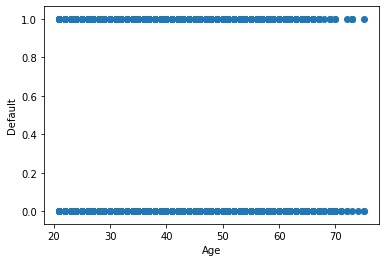

In [78]:
fig,ax = plt.subplots()
ax.scatter(x = ccd['AGE'], y = ccd['default.payment.next.month'])
plt.ylabel('Default')
plt.xlabel('Age')
plt.show()

In [ ]:
#Outliers from the relevent numeric columns have been removed

# 3. Skewness

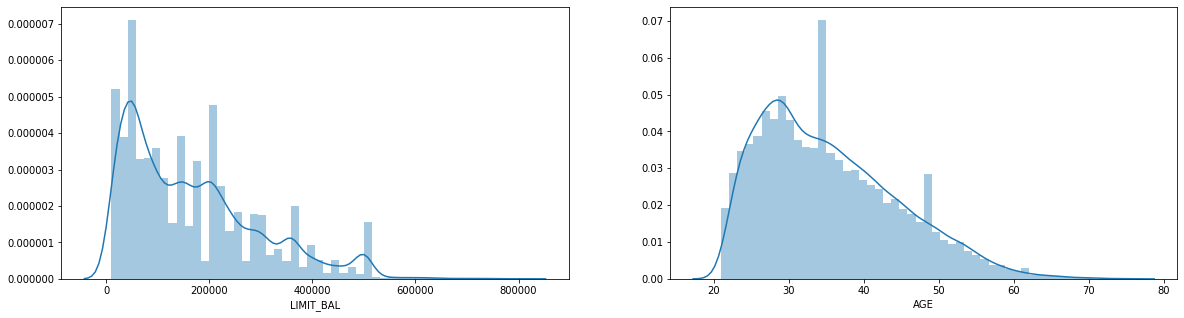

In [54]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(ccd.LIMIT_BAL)

plt.subplot(122)
sns.distplot(ccd.AGE)

plt.show()

# Visualizations for Inferences

# 1. Limit balance

In [79]:
ccd['CreditBin'] = pd.cut(ccd['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(ccd['CreditBin'].value_counts())

(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1597
(500000, 1100000]     205
Name: CreditBin, dtype: int64


In [66]:
ccd['default.payment.next.month'].groupby(ccd['CreditBin']).value_counts()

CreditBin          default.payment.next.month
(100000, 150000]   0                             3076
                   1                              825
(150000, 200000]   0                             3268
                   1                              710
(200000, 300000]   0                             4247
                   1                              812
(300000, 400000]   0                             2371
                   1                              388
(400000, 500000]   0                             1403
                   1                              194
(5000, 50000]      0                             5236
                   1                             2440
(50000, 100000]    0                             3578
                   1                             1244
(500000, 1100000]  0                              183
                   1                               23
Name: default.payment.next.month, dtype: int64

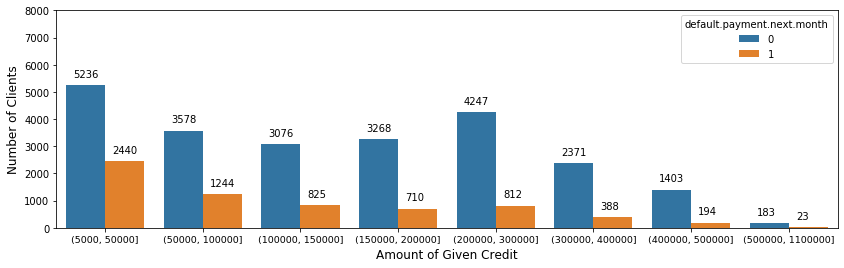

In [74]:
plt.figure(figsize=(14,4))

ccd['CreditBin'] = ccd['CreditBin'].astype('str')
CreditBin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']


ax = sns.countplot(data = ccd, x = 'CreditBin', hue="default.payment.next.month", order = CreditBin_order)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,8000)
ax.tick_params(axis="x", labelsize= 9.5)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

In [87]:
#Maximum People have taken credit in the 5000-50000 range followed by 200000-300000.

In [88]:
#Plotting Percentages

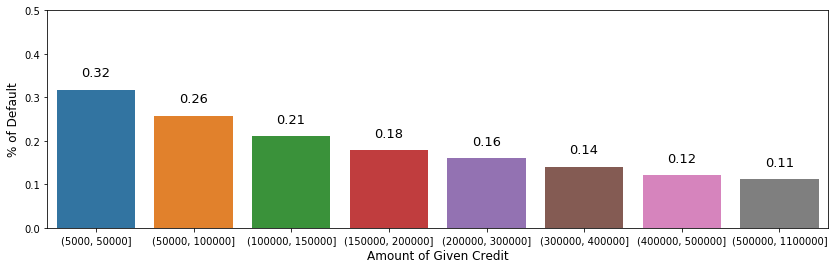

In [90]:
plt.figure(figsize=(14,4))

ax = sns.barplot(x = "CreditBin", y = "default.payment.next.month", data = ccd, ci = None, order = CreditBin_order)
plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

In [ ]:
#Probability of Payment Default is maximum in the range 5000-50000 followed by 50000-100000.

# 2. Age

In [75]:
ccd['AgeBin'] = pd.cut(ccd['AGE'],[20,30,40,50,60,70,80])
print(ccd['AgeBin'].value_counts())

(20, 30]    11013
(30, 40]    10713
(40, 50]     6004
(50, 60]     1997
(60, 70]      257
(70, 80]       14
Name: AgeBin, dtype: int64


In [76]:
ccd['default.payment.next.month'].groupby(ccd['AgeBin']).value_counts()

AgeBin    default.payment.next.month
(20, 30]  0                             8542
          1                             2471
(30, 40]  0                             8524
          1                             2189
(40, 50]  0                             4605
          1                             1399
(50, 60]  0                             1493
          1                              504
(60, 70]  0                              189
          1                               68
(70, 80]  0                                9
          1                                5
Name: default.payment.next.month, dtype: int64

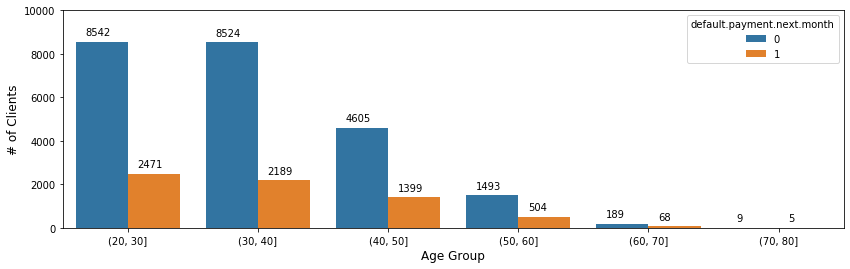

In [83]:
plt.figure(figsize=(14,4))

ccd['AgeBin'] = ccd['AgeBin'].astype('str')
AgeBin_order = ['(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]', '(60, 70]', '(70, 80]']

ax = sns.countplot(data = ccd, x = 'AgeBin', hue="default.payment.next.month", order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,10000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

In [84]:
#Maximum People who have taken credit are of 20-30 years of age followed by 30-40.


In [85]:
#Plotting percentages

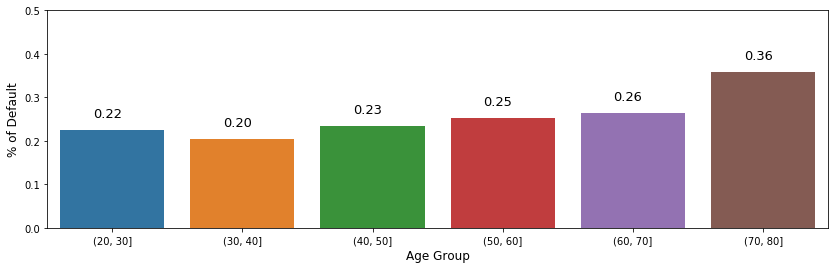

In [86]:
plt.figure(figsize=(14,4))

ax = sns.barplot(x = "AgeBin", y = "default.payment.next.month", data = ccd, ci = None, order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

In [91]:
#Probability of Payment Default is maximum in the age groups 70-80 followed by 60-70 and 50-60.

# 3. Repayment Status

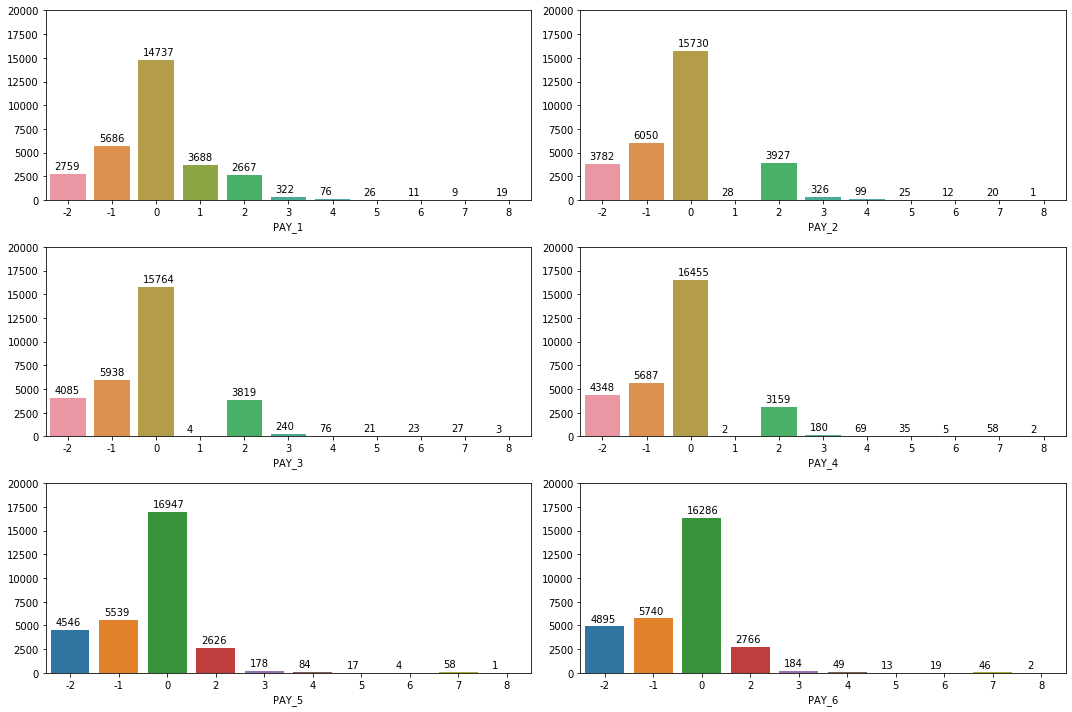

In [102]:
repay_lst = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,10))

for i,col in enumerate(repay_lst):    
    plt.subplot(3,2,i+1)
    ax = sns.countplot(ccd.loc[:,col])
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.10, p.get_height()+500))

plt.show()

In [ ]:
#There are very few customers with a payment delay of more than 3 months
#Most of the customers are repaying their credits on time

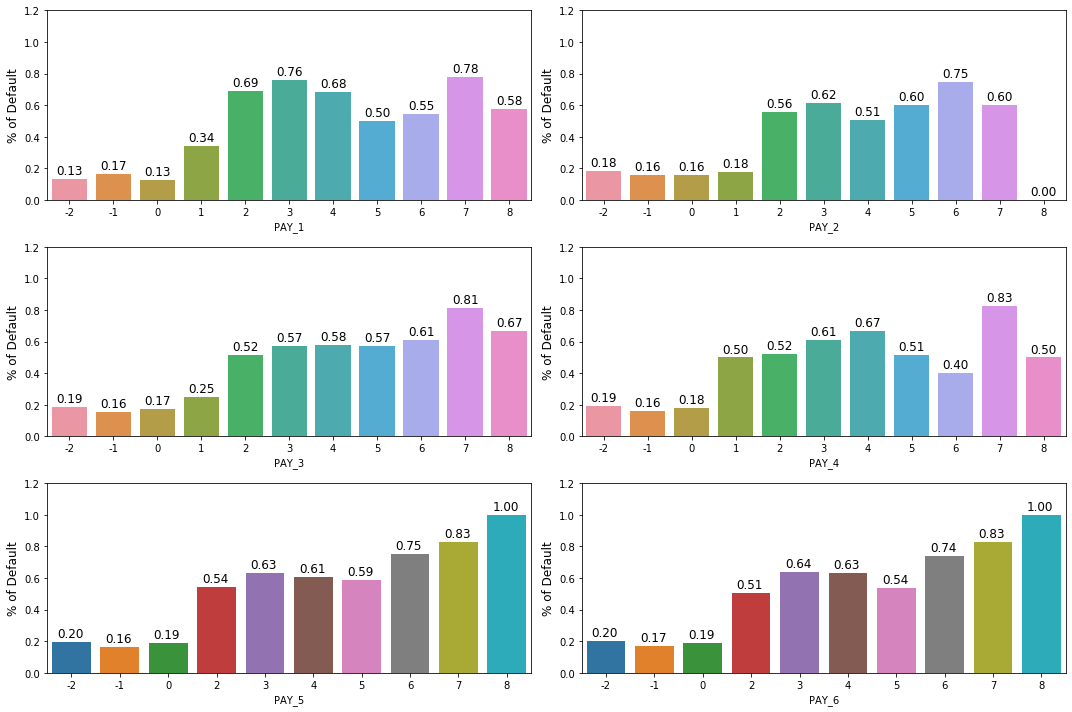

In [103]:
plt.figure(figsize=(15,10))

for i,col in enumerate(repay_lst):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default.payment.next.month", data = ccd, ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.10, p.get_height()+0.03),fontsize=12)

plt.show()

In [106]:
#Customers with pending payment of 6 plus months have maximum chances of defaulting

# 4. Education

In [108]:
ccd['default.payment.next.month'].groupby(ccd['EDUCATION']).value_counts()

EDUCATION  default.payment.next.month
0          0                                14
1          0                              8549
           1                              2036
2          0                             10700
           1                              3330
3          0                              3680
           1                              1237
4          0                               116
           1                                 7
5          0                               262
           1                                18
6          0                                43
           1                                 8
Name: default.payment.next.month, dtype: int64

In [109]:
ccd.loc[:,'EDUCATION'] = ccd.loc[:,'EDUCATION'].replace(0,5)
ccd.loc[:,'EDUCATION'] = ccd.loc[:,'EDUCATION'].replace(6,5)

In [110]:
ccd['default.payment.next.month'].groupby(ccd['EDUCATION']).value_counts()

EDUCATION  default.payment.next.month
1          0                              8549
           1                              2036
2          0                             10700
           1                              3330
3          0                              3680
           1                              1237
4          0                               116
           1                                 7
5          0                               319
           1                                26
Name: default.payment.next.month, dtype: int64

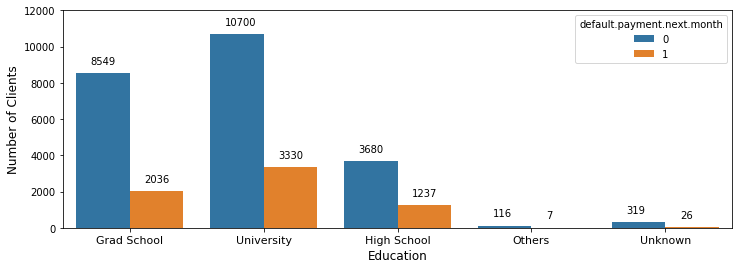

In [115]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = ccd, x = 'EDUCATION', hue="default.payment.next.month")

plt.xlabel("Education", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))

plt.show()

In [112]:
#Maximum clients have completed education from university followed by grad school

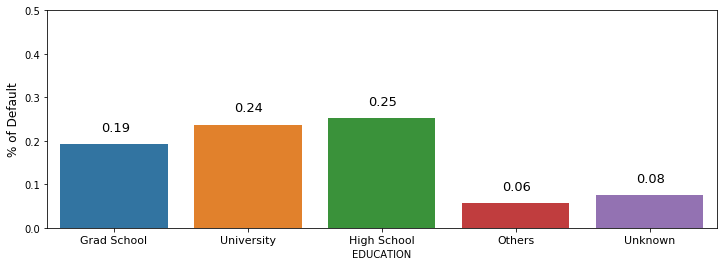

In [117]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "EDUCATION", y = "default.payment.next.month", data = ccd,  ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

In [118]:
#Customers with high school education have maximum probability of defaulting followed by university 


# 5. Marriage

In [119]:
ccd['default.payment.next.month'].groupby(ccd['MARRIAGE']).value_counts()

MARRIAGE  default.payment.next.month
0         0                                49
          1                                 5
1         0                             10453
          1                              3206
2         0                             12623
          1                              3341
3         0                               239
          1                                84
Name: default.payment.next.month, dtype: int64

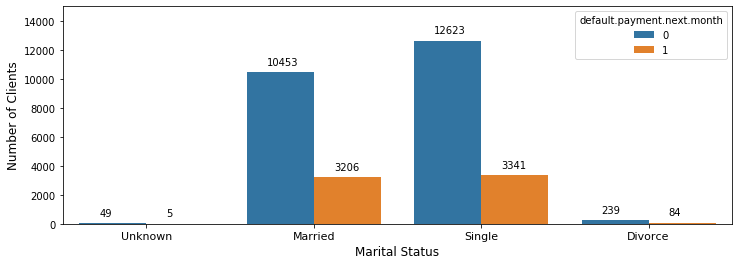

In [120]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = ccd, x = 'MARRIAGE', hue="default.payment.next.month")

plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,15000)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))

plt.show()

In [ ]:
#Maximum clients are single

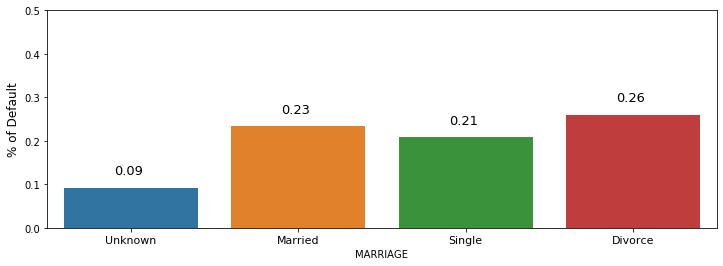

In [122]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "MARRIAGE", y = "default.payment.next.month", data = ccd, ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

In [123]:
#Divorcees have higher probability of defaulting
#Married customers have more chances of defaulting than singles

# 4. One-Hot Encoding



In [82]:
cat_df = ccd[['SEX', 'EDUCATION', 'MARRIAGE']]

In [83]:
cat_df

,SEX,EDUCATION,MARRIAGE
ID,,,
1,2,2,1
2,2,2,2
3,2,2,2
4,2,2,1
5,1,2,1
...,...,...,...
29996,1,3,1
29997,1,3,2
29998,1,2,2


In [84]:
onehotencoder = OneHotEncoder()

In [85]:
cat = onehotencoder.fit_transform(cat_df).toarray()

In [86]:
cat = pd.DataFrame(cat)
cat

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29994,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29995,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [87]:
ccd_new = ccd.drop(['SEX', 'EDUCATION', 'MARRIAGE' ], axis = 1)

In [88]:
ccd_new


,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,CreditBin
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,"(5000, 50000]"
2,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,"(100000, 150000]"
3,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,"(50000, 100000]"
4,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,"(5000, 50000]"
5,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,"(5000, 50000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,39,0,0,0,0,0,0,188948.0,192815.0,...,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,"(200000, 300000]"
29997,150000.0,43,-1,-1,-1,-1,0,0,1683.0,1828.0,...,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,"(100000, 150000]"
29998,30000.0,37,4,3,2,-1,0,0,3565.0,3356.0,...,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,"(5000, 50000]"


In [89]:
ccd_new = pd.concat([cat, ccd_new], axis=1)
ccd_new

,0,1,2,3,4,5,6,7,8,9,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,CreditBin
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0,"(5000.0, 50000.0]"
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0,"(100000.0, 150000.0]"
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,"(50000.0, 100000.0]"
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,"(5000.0, 50000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0,"(200000.0, 300000.0]"
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0,"(100000.0, 150000.0]"
29998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0,"(5000.0, 50000.0]"
29999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0,"(50000.0, 100000.0]"


In [90]:
ccd_new = ccd_new.drop(0)

In [91]:
ccd_new = ccd_new.drop(30000)
ccd_new = ccd_new.drop(29999)
ccd_new = ccd_new.drop(29998)

In [92]:
ccd_new


,0,1,2,3,4,5,6,7,8,9,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,CreditBin
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0,"(5000, 50000]"
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0,"(100000, 150000]"
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,"(50000, 100000]"
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,"(5000, 50000]"
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0,"(5000, 50000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,"(5000, 50000]"
29994,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,69473.0,55004.0,2000.0,111784.0,4000.0,3000.0,2000.0,2000.0,0.0,"(50000, 100000]"
29995,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1.0,"(50000, 100000]"
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0,"(200000, 300000]"


In [100]:
ccd_new.to_csv('/Users/ashishpodar/Desktop/Datasets/ccd_new.csv')

In [101]:
ccd_new = pd.read_csv('/Users/ashishpodar/Desktop/Datasets/ccd_new.csv',index_col = 'Unnamed: 0')

# 5. Scaling

In [108]:
num_df = ccd.drop(['SEX','EDUCATION','MARRIAGE','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default.payment.next.month'], axis = 1)

In [110]:
scaler = StandardScaler()
num_df = num_df.drop('CreditBin', axis =1)

In [111]:
num_df

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,
1,20000.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0


In [112]:
num_df = pd.DataFrame(scaler.fit_transform(num_df), columns = num_df.columns)
num_df

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.137263,-0.643832,-0.648950,-0.668468,-0.674227,-0.665172,-0.655101,-0.341864,-0.227013,-0.308544,-0.307978,-0.314050,-0.293301
1,-0.365963,-0.660599,-0.668362,-0.639690,-0.623186,-0.608101,-0.600081,-0.341864,-0.213515,-0.249158,-0.244138,-0.314050,-0.180788
2,-0.597353,-0.298864,-0.494935,-0.482632,-0.450671,-0.418255,-0.392756,-0.250205,-0.191813,-0.249158,-0.244138,-0.248589,-0.012019
3,-0.905873,-0.057076,-0.012715,0.033318,-0.232544,-0.186816,-0.156580,-0.221101,-0.169287,-0.237281,-0.237754,-0.244072,-0.237045
4,-0.905873,-0.579758,-0.612747,-0.160979,-0.347575,-0.348911,-0.332320,-0.221101,1.335159,0.285311,0.266583,-0.268947,-0.255103
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,0.405338,1.876546,2.025530,2.330259,0.698587,-0.149187,-0.385484,0.171378,0.611148,-0.011438,-0.113457,0.013257,-0.237045
29994,-0.134572,-0.674207,-0.666910,-0.627850,-0.534160,-0.579442,-0.655101,-0.230943,-0.103878,0.225807,-0.299743,-0.314050,-0.293301
29995,-1.060133,-0.648572,-0.645369,-0.638592,-0.348542,-0.325191,-0.328507,-0.341864,-0.256918,0.997936,-0.039849,-0.183128,-0.118906
29996,-0.674483,-0.719538,0.412268,0.423371,0.149018,-0.469347,0.170689,4.844894,-0.108956,-0.238587,-0.185022,3.153047,-0.191815


In [114]:
ccd_new = ccd_new.drop(['LIMIT_BAL', 'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','CreditBin'], axis = 1)

In [115]:
ccd_new

,0,1,2,3,4,5,6,7,8,9,...,11,12,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,43.0,0.0,0.0,0.0,-2.0,-2.0,-2.0,0.0
29994,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,38.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0
29995,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,34.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
num_df

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130
29996,-0.134759,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382
29997,-1.059646,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001
29998,-0.674276,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904


In [116]:
ccd_new = pd.concat([num_df, ccd_new], axis=1)
ccd_new

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,11,12,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
0,-1.137263,-0.643832,-0.648950,-0.668468,-0.674227,-0.665172,-0.655101,-0.341864,-0.227013,-0.308544,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.365963,-0.660599,-0.668362,-0.639690,-0.623186,-0.608101,-0.600081,-0.341864,-0.213515,-0.249158,...,1.0,0.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,1.0
2,-0.597353,-0.298864,-0.494935,-0.482632,-0.450671,-0.418255,-0.392756,-0.250205,-0.191813,-0.249158,...,1.0,0.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,1.0
3,-0.905873,-0.057076,-0.012715,0.033318,-0.232544,-0.186816,-0.156580,-0.221101,-0.169287,-0.237281,...,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.905873,-0.579758,-0.612747,-0.160979,-0.347575,-0.348911,-0.332320,-0.221101,1.335159,0.285311,...,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,0.405338,1.876546,2.025530,2.330259,0.698587,-0.149187,-0.385484,0.171378,0.611148,-0.011438,...,0.0,0.0,43.0,0.0,0.0,0.0,-2.0,-2.0,-2.0,0.0
29994,-0.134572,-0.674207,-0.666910,-0.627850,-0.534160,-0.579442,-0.655101,-0.230943,-0.103878,0.225807,...,1.0,0.0,38.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0
29995,-1.060133,-0.648572,-0.645369,-0.638592,-0.348542,-0.325191,-0.328507,-0.341864,-0.256918,0.997936,...,1.0,0.0,34.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
29996,-0.674483,-0.719538,0.412268,0.423371,0.149018,-0.469347,0.170689,4.844894,-0.108956,-0.238587,...,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
ccd_new = ccd_new.drop(0)


In [135]:
ccd_new.isnull().sum()

LIMIT_BAL                     0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
0                             0
1                             0
2                             0
3                             0
4                             0
5                             0
6                             0
7                             0
8                             0
9                             0
10                            0
11                            0
12                            0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5   

In [134]:
ccd_new[ccd_new.isna().any(axis=1)]

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,11,12,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month


In [133]:
ccd_new = ccd_new.drop(2198)
ccd_new = ccd_new.drop(18246)

# Train-test Splitting

In [136]:
X = ccd_new.drop('default.payment.next.month', axis = 1)
y = ccd_new['default.payment.next.month']

In [137]:
y.isnull().sum()

0

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

# Baseline Model - Dummy Classifier

In [139]:
dummy = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

In [140]:
dummy_prediction = dummy.predict(X_test)
dummy_prediction

array([0., 0., 0., ..., 0., 0., 0.])

In [141]:
accuracy_score(y_test, dummy_prediction)

0.7742365648753167

# Creating a Model Comparison Table

In [142]:
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

In [143]:
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()
mlp_model = MLPClassifier()

In [144]:
def models_evaluation(X, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)
    mlp = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)



    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()],
                                       
                                      'Multi Layer Perceptron':[mlp['test_accuracy'].mean(),
                                                              mlp['test_precision'].mean(),
                                                              mlp['test_recall'].mean(),
                                                              mlp['test_f1_score'].mean()]},
                                      
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
     # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)

In [145]:
models_evaluation(X_test, y_test , 5)

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,Multi Layer Perceptron,Best Score
Accuracy,0.802106,0.790506,0.699960,0.811574,0.321924,0.321924,Random Forest
Precision,0.715119,0.706576,0.344941,0.665460,0.239474,0.239474,Logistic Regression
Recall,0.208504,0.129362,0.366229,0.333133,0.911944,0.911944,Gaussian Naive Bayes
F1 Score,0.322516,0.216968,0.355142,0.443655,0.378557,0.378557,Random Forest


In [25]:
#F1 Scores are very low
#Accuracy is almost same as dummy classifier
#This means that data imbalance exists

In [146]:
rfc_model.fit(X_train, y_train)   #Creating a sample RF model for Imbalance Check
pred = rfc_model.predict(X_test)

In [147]:
#Confusion Matrix to check amoumt of imbalance

In [148]:
confusion = confusion_matrix(y_test, pred )
confusion

array([[5500,  306],
       [1086,  607]])

In [226]:
#There is significant amount of imbalance
#Data Resampling is required

# Handling Data Imbalance

In [228]:
#Using SMOTE over sampling technique

In [54]:
X=np.array(X)

In [149]:
sm = SMOTE(sampling_strategy = 'auto')

In [150]:
X_res, y_res = sm.fit_resample(X,y)

In [151]:
X_res = pd.DataFrame(X_res, columns = X.columns)

In [152]:
res_ccd = pd.concat([X_res, y_res], axis = 1)
res_ccd

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,11,12,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
0,-0.365963,-0.660599,-0.668362,-0.639690,-0.623186,-0.608101,-0.600081,-0.341864,-0.213515,-0.249158,...,1.000000,0.000000,24.000000,2.000000,2.000000,-1.000000,-1.000000,-2.000000,-2.000000,1.0
1,-0.597353,-0.298864,-0.494935,-0.482632,-0.450671,-0.418255,-0.392756,-0.250205,-0.191813,-0.249158,...,1.000000,0.000000,26.000000,-1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,1.0
2,-0.905873,-0.057076,-0.012715,0.033318,-0.232544,-0.186816,-0.156580,-0.221101,-0.169287,-0.237281,...,0.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,-0.905873,-0.579758,-0.612747,-0.160979,-0.347575,-0.348911,-0.332320,-0.221101,1.335159,0.285311,...,0.000000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,-0.905873,0.180067,0.111850,0.153411,-0.371691,-0.341098,-0.317253,-0.190910,-0.178141,-0.269527,...,1.000000,0.000000,57.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46719,0.192294,-0.655663,-0.678375,-0.639354,-0.582737,-0.627939,-0.625918,-0.338344,-0.182262,-0.019822,...,0.000000,0.000000,53.044832,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,1.0
46720,-0.635947,-0.618789,-0.575428,-0.556510,-0.528253,-0.542754,-0.569271,-0.172221,-0.224391,-0.138661,...,1.000000,0.000000,43.500387,1.499613,2.000000,2.000000,2.000000,2.999226,2.499613,1.0
46721,0.756897,-0.691348,-0.676866,-0.663925,-0.682466,-0.673897,-0.656054,-0.261431,-0.256849,-0.308544,...,1.000000,0.000000,29.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0
46722,-0.403851,0.501296,0.498437,0.511147,0.486477,0.565158,0.572697,-0.289615,-0.136264,-0.162355,...,0.754383,0.000000,34.000000,2.000000,2.000000,2.000000,2.000000,0.491234,0.000000,1.0


In [153]:
res_ccd.shape

(46724, 34)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,random_state = 42) #Train test split for resampled

In [156]:
models_evaluation(X_test, y_test , 5) #Model comparison for resampled data

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,Multi Layer Perceptron,Best Score
Accuracy,0.666980,0.668778,0.712439,0.830495,0.552266,0.552266,Random Forest
Precision,0.702668,0.708660,0.711301,0.877631,0.535178,0.535178,Random Forest
Recall,0.582956,0.576811,0.718501,0.769374,0.848592,0.848592,Gaussian Naive Bayes
F1 Score,0.636970,0.635755,0.714760,0.819896,0.655125,0.655125,Random Forest


In [303]:
#Random Forest gives the best Accuracy Score

In [157]:
dummy = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

In [158]:
dummy_prediction = dummy.predict(X_test)
dummy.score(X_test, y_test)   

0.4985018405958394

In [306]:
#Reduced dummy classifier score indicates that no imbalance exists

In [159]:
#Trying out boosting algorithms
xgb = XGBClassifier(objective= 'binary:logistic', n_estimators=70, seed=101).fit(X_train, y_train)

In [160]:
xgpred = xgb.predict(X_test)

In [161]:
accuracy_score(xgpred, y_test) 

0.8233027994178581

In [340]:
#Random forest performs better

# Hyperparameter Tuning to improve the model

In [162]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [163]:
params =  {'n_estimators': [200,400,600,800,1000],
           'max_features': ['auto', 'sqrt'],
           'max_depth': [10,20,30,40,50,None],
           'min_samples_split': [2,5,10],
           'min_samples_leaf': [1,2,4],
           'bootstrap': [True, False]}

In [164]:
params

{'n_estimators': [200, 400, 600, 800, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [165]:
random_search = RandomizedSearchCV(rfc_model, param_distributions=params, n_iter = 5, scoring = 'roc_auc', n_jobs = -1, cv=5,verbose = 3)

In [166]:
random_search.fit(X_res, y_res)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 15.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   scoring='roc_auc', verbose=3)

In [44]:
random_search.best_estimator_ 

RandomForestClassifier(bootstrap=False, max_depth=40, n_estimators=800)

In [45]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
predicted = rfc_model.predict(X_test)
predicted

array([1., 1., 0., ..., 1., 1., 0.])

In [47]:
accuracy_score(predicted, y_test)   

0.8656908063687725

In [56]:
#Final Accuracy Score = 86.56

In [59]:
print(confusion_matrix(predicted, y_test))

[[5349 1099]
 [ 470 4764]]


In [62]:
print(classification_report(predicted, y_test))

              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87      6448
         1.0       0.81      0.91      0.86      5234

    accuracy                           0.87     11682
   macro avg       0.87      0.87      0.87     11682
weighted avg       0.87      0.87      0.87     11682



# Final Accuracy Score = 86.56